In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/exams.csv")
df.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5


In [5]:
df.shape

(345779, 15)

Text(0, 0.5, 'Predicted Age')

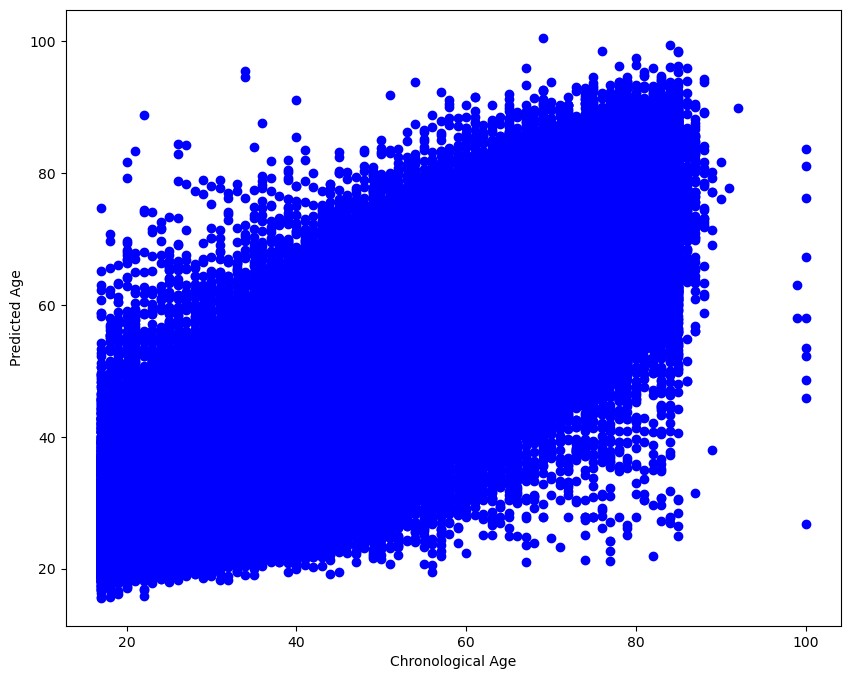

In [6]:
plt.figure(figsize=(10, 8))
norm_pop = df['normal_ecg']
plt.scatter(df[norm_pop]['age'], df[norm_pop]['nn_predicted_age'], color='blue')
# plt.scatter(df[~norm_pop]['age'], df[~norm_pop]['nn_predicted_age'], color = 'red', alpha=0.2)
plt.xlabel('Chronological Age')
plt.ylabel('Predicted Age')

In [7]:
# This is our population to work with in step 1
df_pop = df[
    (abs (df['age']- df['nn_predicted_age']) < 1) &
    (df['normal_ecg'])
 ]

In [8]:
df_pop.shape

(10923, 15)

In [9]:
df_pop.index

Index([    85,    203,    270,    289,    299,    307,    345,    389,    416,
          434,
       ...
       345495, 345524, 345572, 345585, 345589, 345594, 345628, 345641, 345715,
       345760],
      dtype='int64', length=10923)

In [10]:
df_pop['trace_file'].value_counts()

trace_file
exams_part16.hdf5    772
exams_part15.hdf5    669
exams_part13.hdf5    640
exams_part0.hdf5     639
exams_part7.hdf5     634
exams_part3.hdf5     633
exams_part10.hdf5    632
exams_part5.hdf5     629
exams_part11.hdf5    628
exams_part14.hdf5    623
exams_part6.hdf5     617
exams_part8.hdf5     611
exams_part2.hdf5     610
exams_part1.hdf5     606
exams_part12.hdf5    599
exams_part9.hdf5     598
exams_part4.hdf5     590
exams_part17.hdf5    193
Name: count, dtype: int64

<Axes: >

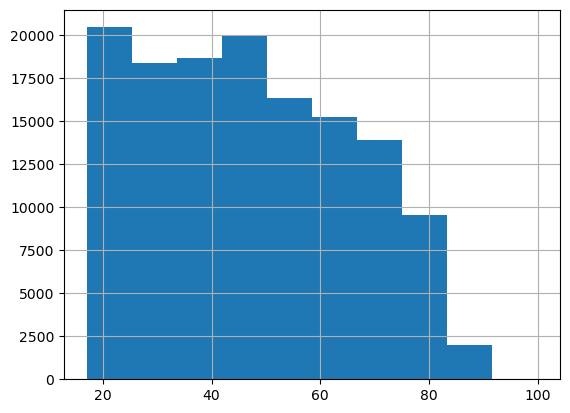

In [13]:
df[df['normal_ecg']]['age'].hist()

Text(0.5, 0, 'seconds')

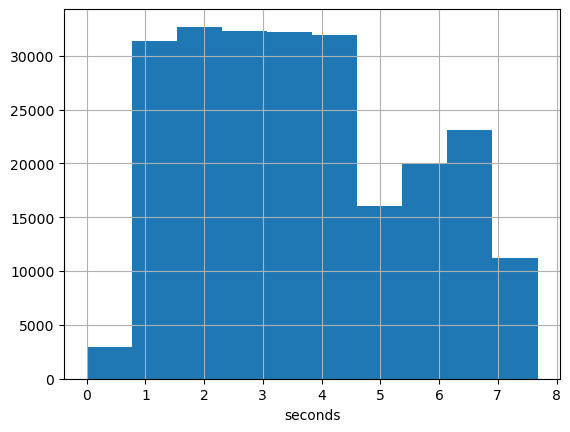

In [15]:
# how long the ECGs are
df['timey'].hist()
plt.xlabel("seconds")

<Axes: >

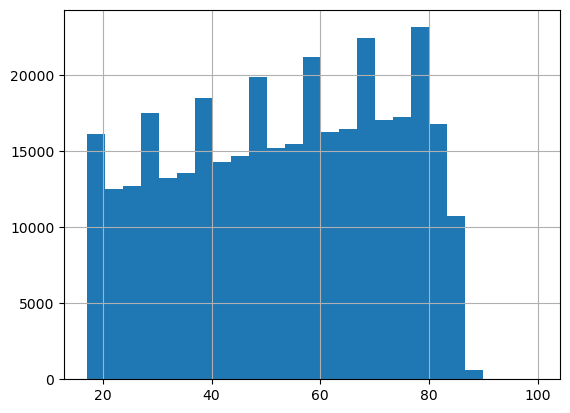

In [6]:
df['age'].hist(bins=25)

In [7]:
df['normal_ecg'].value_counts()

normal_ecg
False    211122
True     134657
Name: count, dtype: int64

<Axes: >

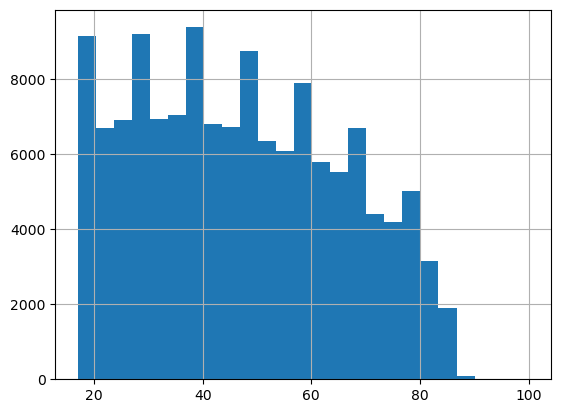

In [8]:
df[df['normal_ecg']]['age'].hist(bins=25)

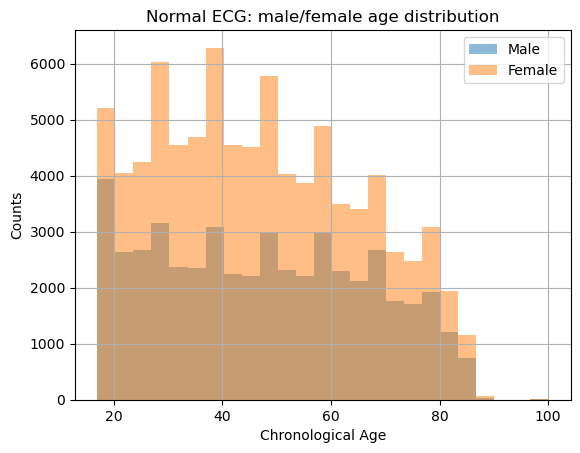

In [16]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['age'].hist(bins=25, alpha=0.5, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['age'].hist(bins=25, alpha=0.5, label='Female')
plt.xlabel("Chronological Age")
plt.ylabel("Counts")
plt.title("Normal ECG: male/female chronological age distribution")
plt.legend()
plt.show()

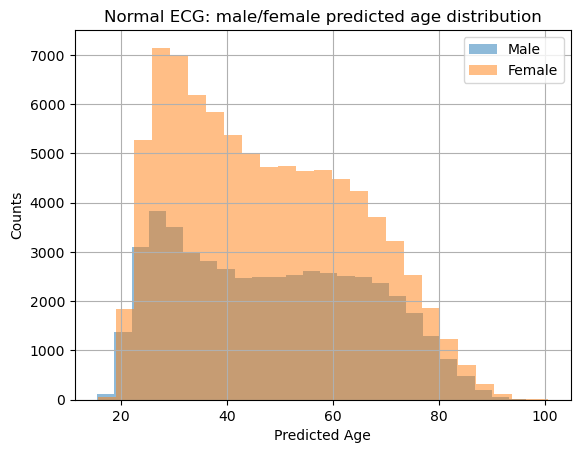

In [17]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, label='Female')
plt.title("Normal ECG: male/female predicted age distribution")
plt.xlabel("Predicted Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

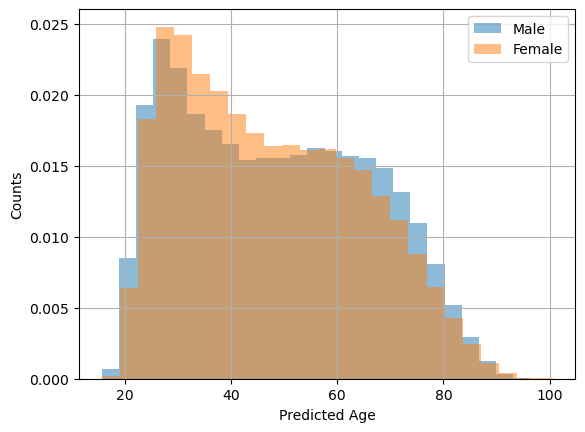

In [11]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, density=True, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['nn_predicted_age'].hist(bins=25, alpha=0.5, density=True, label='Female')
plt.xlabel("Predicted Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

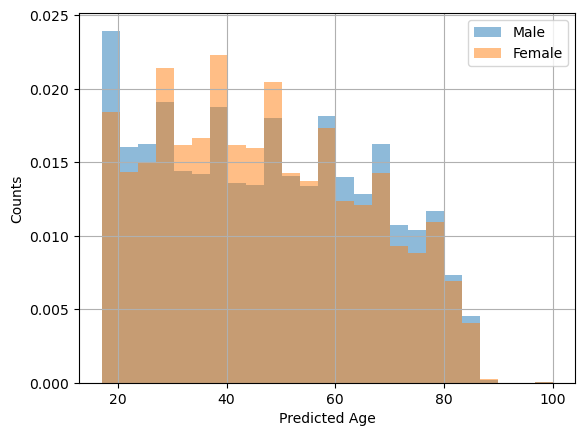

In [12]:
df[
    (df['normal_ecg']) &
    (df['is_male'])
]['age'].hist(bins=25, alpha=0.5, density=True, label='Male')
df[
    (df['normal_ecg']) &
    ~(df['is_male'])
]['age'].hist(bins=25, alpha=0.5, density=True, label='Female')
plt.xlabel("Predicted Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [13]:
df['is_male'].value_counts()

is_male
False    206576
True     139203
Name: count, dtype: int64

In [14]:
df['is_male'].value_counts(normalize=True)

is_male
False    0.597422
True     0.402578
Name: proportion, dtype: float64

# To read the IDs from the file

In [10]:
import h5py
filename = "data/exams.hdf5"

with h5py.File(filename, "r") as f:
    ids_key = list(f.keys())[0]

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data_ = list(f[ids_key])

    # preferred methods to get dataset values:
    ds_arr_ = f[ids_key][()]  # returns as a numpy array

# To read the data from the file

In [15]:
import h5py
filename = "data/exams_part0.hdf5"

with h5py.File(filename, "r") as f:
    data_key = list(f.keys())[1]

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[data_key])

    # preferred methods to get dataset values:
    ds_arr = f[data_key][()]  # returns as a numpy array


Keys: <KeysViewHDF5 ['exam_id', 'tracings']>
<class 'h5py._hl.dataset.Dataset'>


In [16]:
ds_arr['exam_id']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
len(data)

20001

In [18]:
with h5py.File(filename, "r") as f:
    keys = list(f.keys())
    for key in keys:
        data = list(f[a_group_key])
        print(len(data))


20001
20001


In [20]:
with h5py.File(filename, 'w') as f:
    f['dataset'] = range(10)

<Closed HDF5 file>

In [1]:
import numpy as np
from tempfile import TemporaryFile
outfile = TemporaryFile()

In [2]:
arr = np.array([x for x in range(3)])
# np.save(outfile, arr)

In [7]:
_ = outfile.seek(0) # Only needed to simulate closing & reopening file

np.load(outfile)

array([0, 1, 2])

In [3]:
with open('test.npy', 'wb') as f:
    np.save(f, arr)

with open('test.npy', 'rb') as f:
    a = np.load(f)
a

array([0, 1, 2])

In [8]:
isinstance(a, np.ndarray)

True

In [6]:
s = 'str'
isinstance(s, str)

True

In [ ]:
import h5py
import numpy as np

# Create a sample array
data = np.random.rand(100, 200)

# Save it to an HDF5 file
with h5py.File('output.h5', 'w') as f:
    f.create_dataset('my_array', data=data)


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
df = pd.read_csv("data/reconstructed_trace_16.csv", header=None)
recon = df.values

In [7]:
recon.shape

(772, 49152)

In [9]:
recon[0, 0]

np.float64(-8.427234570262954e-05)

In [10]:
recon_3d = recon.reshape([772, 4096, 12])
recon_3d.shape

(772, 4096, 12)

In [15]:
arr = np.load("output/p16/id_1683849_age_35_recon.npy")
arr.shape

(61, 4096, 12)

In [18]:
arr[(35-20), :, :].shape

(4096, 12)

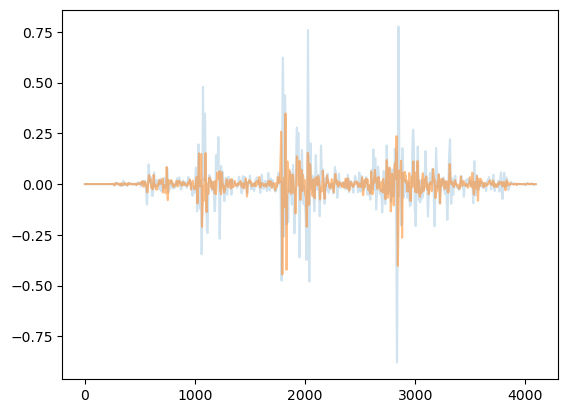

In [30]:
plt.plot([x for x in range(4096)], recon_3d[0, :, 0], alpha=0.2) 
plt.plot([x for x in range(4096)], arr[(35-20), :, 1], alpha=0.5)

In [26]:
arr[(35-20), :, 0]

array([-8.42723457e-05, -1.99716495e-04, -3.32629017e-04, ...,
       -9.84155806e-04, -1.01080351e-03, -9.50987218e-04], shape=(4096,))

In [27]:
recon_3d[0, :, 0]

array([-8.42723457e-05, -1.99716495e-04, -3.32629017e-04, ...,
       -9.84155806e-04, -1.01080351e-03, -9.50987218e-04], shape=(4096,))

In [31]:
23986304 * 13

311821952